In [ ]:
#Cricket Player Performance Prediction using machine learning

In [1]:
!pip install scikit-learn
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
WCplayers=pd.read_csv('C:/Users/swarn/Downloads/archive(1)/WC_players.csv')

In [3]:
groundAVG=pd.read_csv('C:/Users/swarn/Downloads/archive(1)/Ground_Averages.csv')

In [4]:
ODIresult=pd.read_csv('C:/Users/swarn/Downloads/archive(1)/ODI_Match_Results.csv')

In [5]:
ODItotal=pd.read_csv('C:/Users/swarn/Downloads/archive(1)/ODI_Match_Totals.csv')

In [6]:
bowler=pd.read_csv('C:/Users/swarn/Downloads/archive(1)/Bowler_data.csv')

In [7]:
batsman=pd.read_csv('C:/Users/swarn/Downloads/archive(1)/Batsman_Data.csv')

In [8]:
WCplayers.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [9]:
groundAVG.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [10]:
ODIresult.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [11]:
ODItotal.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [12]:
bowler.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [13]:
batsman.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [30]:
#we only take batsman and balling dataset into consideration and further cleaning the dataset,
#we import the following dataset
players=pd.read_csv('C:/Users/swarn/Desktop/cricketplayerprediction.csv')

In [31]:
players.head()

,Player,Mat,BatInn,BowlInn,NotOut,Runs,BF,SR,100,4s,6s,OBowled,WktsTaken,Catches,RunsConceded,BowlAvg,BatAvg,Wkt_5,Maidens
0,Bhuvneshwar Kumar,6,2,6,0,2,4,50.00,0,0,0,51.4,10,1,269,26.90,1.00,0,1
1,Hardik Pandya,9,9,9,2,226,201,112.43,0,21,4,79.0,10,3,447,44.70,32.28,0,1
2,Jasprit Bumrah,9,3,9,3,1,1,100.00,0,0,0,84.0,18,1,371,20.61,0.00,0,9
3,Kedar Jadhav,6,5,3,3,80,99,80.80,0,6,1,6.0,0,4,34,0.00,40.00,0,0
4,Kuldeep Yadav,7,2,7,2,1,2,50.00,0,0,0,67.0,6,0,337,56.16,0.00,0,2


In [32]:
players.isnull().sum()

Player          0
Mat             0
BatInn          0
BowlInn         0
NotOut          0
Runs            0
BF              0
SR              0
100             0
4s              0
6s              0
OBowled         0
WktsTaken       0
Catches         0
RunsConceded    0
BowlAvg         0
BatAvg          0
Wkt_5           0
Maidens         0
dtype: int64

In [33]:
players.replace(np.NaN,0)

,Player,Mat,BatInn,BowlInn,NotOut,Runs,BF,SR,100,4s,6s,OBowled,WktsTaken,Catches,RunsConceded,BowlAvg,BatAvg,Wkt_5,Maidens
0,Bhuvneshwar Kumar,6,2,6,0,2,4,50.00,0,0,0,51.4,10,1,269,26.90,1.00,0,1
1,Hardik Pandya,9,9,9,2,226,201,112.43,0,21,4,79.0,10,3,447,44.70,32.28,0,1
2,Jasprit Bumrah,9,3,9,3,1,1,100.00,0,0,0,84.0,18,1,371,20.61,0.00,0,9
3,Kedar Jadhav,6,5,3,3,80,99,80.80,0,6,1,6.0,0,4,34,0.00,40.00,0,0
4,Kuldeep Yadav,7,2,7,2,1,2,50.00,0,0,0,67.0,6,0,337,56.16,0.00,0,2
5,Dinesh Karthik,3,2,0,0,14,34,41.17,0,2,0,0.0,0,3,0,0.00,7.00,0,0
6,KL Rahul,9,9,0,1,361,466,77.46,1,31,5,0.0,0,1,0,0.00,45.12,0,0
7,Mohammed Shami,4,3,4,0,2,6,33.33,0,0,0,35.1,14,3,193,13.78,0.66,1,2
8,MS Dhoni,9,8,0,2,273,311,87.78,0,20,5,0.0,0,7,0,0.00,45.50,0,0
9,Ravindra Jadeja,2,1,2,0,77,59,130.50,0,4,4,20.0,2,3,74,37.00,77.00,0,0


In [34]:
players.isnull().sum()

Player          0
Mat             0
BatInn          0
BowlInn         0
NotOut          0
Runs            0
BF              0
SR              0
100             0
4s              0
6s              0
OBowled         0
WktsTaken       0
Catches         0
RunsConceded    0
BowlAvg         0
BatAvg          0
Wkt_5           0
Maidens         0
dtype: int64

<Axes: xlabel='Player', ylabel='Runs'>

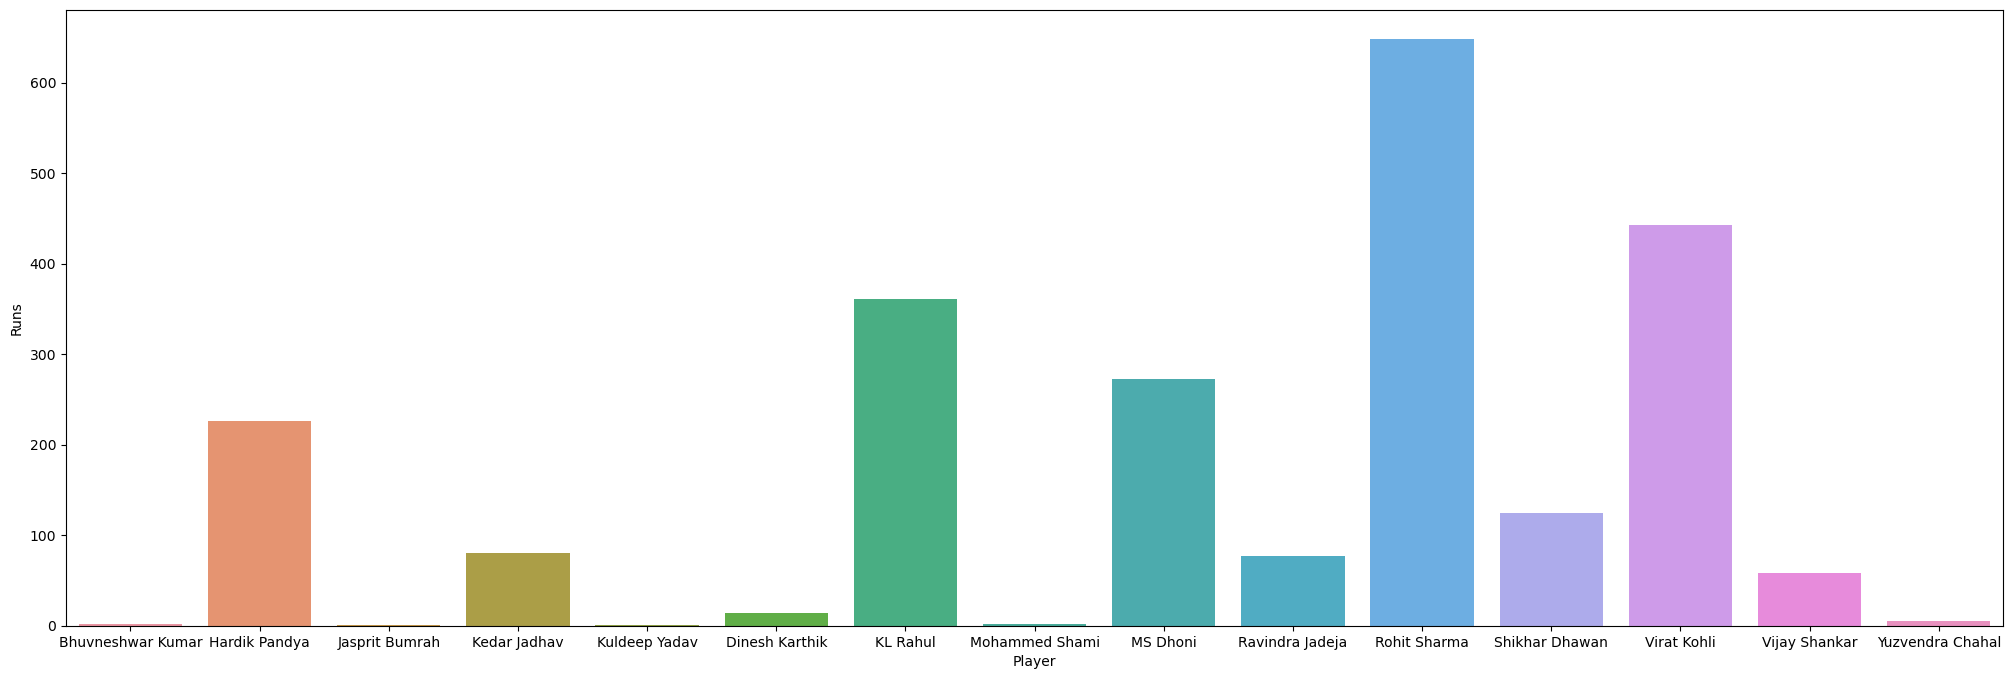

In [45]:
plt.figure(figsize=(25,8))
sns.barplot(data=players,x='Player',y='Runs')

<Axes: xlabel='Player', ylabel='BowlAvg'>

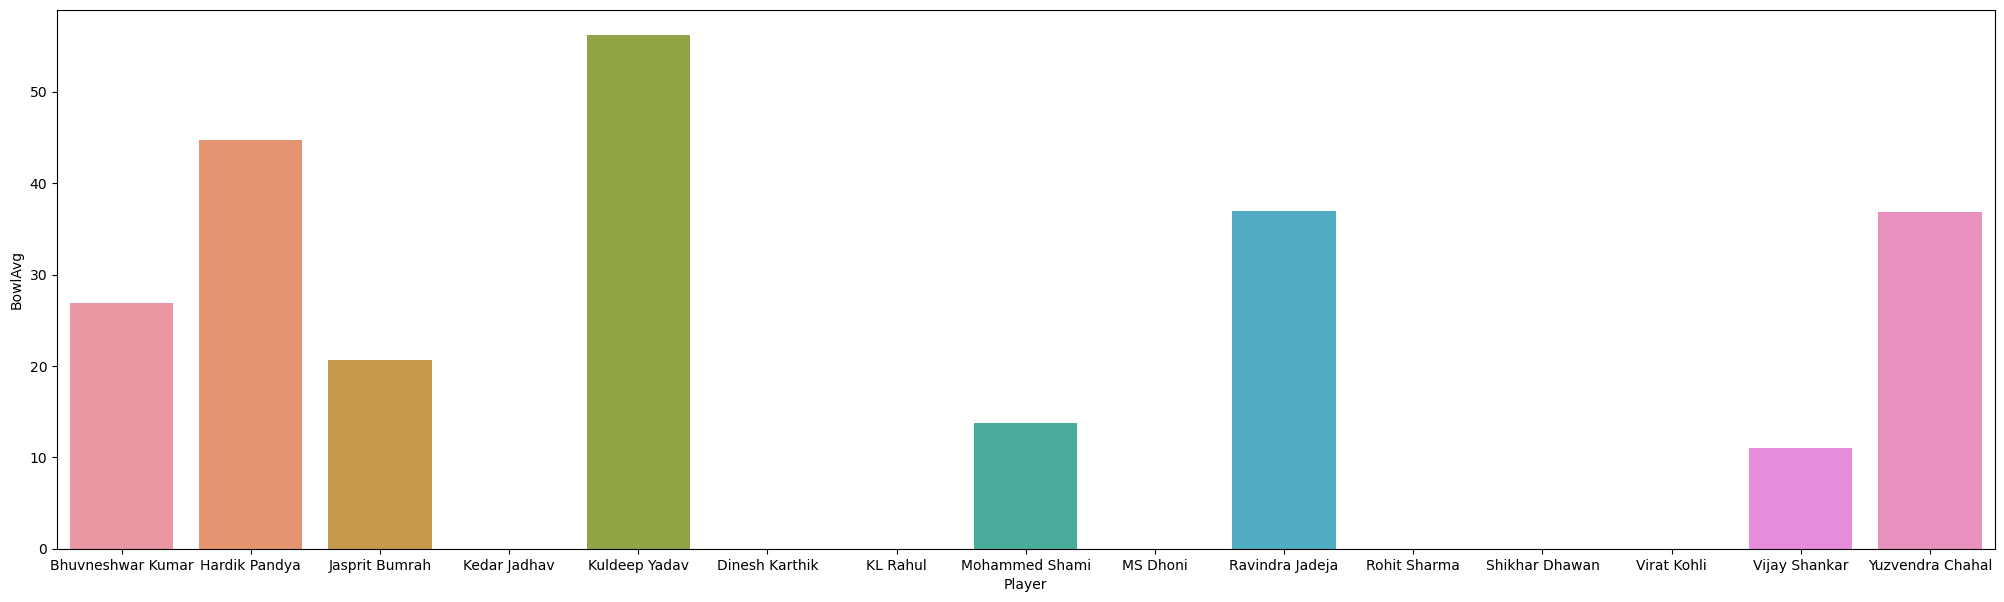

In [44]:
plt.figure(figsize=(25,7))
sns.barplot(data=players,x='Player',y='BowlAvg')

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
players.drop(['Player'],axis=1,inplace=True)
players.columns
x=players.drop("WktsTaken",axis=1)
y=players['WktsTaken']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)
logR=LogisticRegression()
logR.fit(x_train,y_train)

C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
logR.predict(x_test)
score=round(logR.score(x_train,y_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


In [57]:
x1=players.drop("Runs",axis=1)
y1=players['Runs']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=45)
loggR=LogisticRegression()
loggR.fit(x1_train,y1_train)

C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
loggR.predict(x1_test)
score=round(loggR.score(x1_train,y1_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %
